### #1 - Initialization and Library Imports
#### Loading all Python libraries that will be used during the data analysis and visualization process.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

print("The library was imported successfully.")

The library was imported successfully.


### #2 - Test Parameter Configuration
#### Defining all main variables such as data location, server names, and client load scenarios.

In [2]:
BASE_DATA_PATH = '..' 

SERVERS = ['nodejs-ws', 'nodejs-socketio', 'golang-gorilla', 'golang-coder'] 

CLIENT_LOADS = [100, 200, 400, 600, 800, 1000]

print("Configuration ready.")

Configuration ready.


### #3 - Data Loading and Aggregation
#### Finding, reading, and combining all resulting CSV files into three main datasets (DataFrames) for each metric.

In [3]:
def load_data():
    """Reads all CSV files for a single metric from all subfolders and combines them."""
    all_files = []
    print(f"\n--- Loading data for metric: Broadcast Latency ---")
    
    for server in SERVERS:
        for load in CLIENT_LOADS:
            search_pattern = os.path.join(BASE_DATA_PATH, '**', f"broadcast-latency_{server}_{load}clients*.csv")
            found_files = glob.glob(search_pattern, recursive=True)

            if not found_files:
                print(f"Warning: File not found for {server} @ {load} clients (pattern: {search_pattern})")
                continue
            
            filepath = found_files[0]
            print(f"Reading file: {os.path.relpath(filepath)}") 
            
            df = pd.read_csv(filepath)
            df['server'] = server.replace('-', ' ').title()
            df['client_load'] = load
            all_files.append(df)
    
    if not all_files:
        print(f"Error: No data could be loaded.")
        return pd.DataFrame()

    return pd.concat(all_files, ignore_index=True)

# Muat semua data latensi
latency_df = load_data()

print(f"\nBroadcast Latency data loaded successfully: {len(latency_df)} rows")


--- Loading data for metric: Broadcast Latency ---
Reading file: ../client-simulator/broadcast-latency_nodejs-ws_100clients.csv
Reading file: ../client-simulator/broadcast-latency_nodejs-ws_200clients.csv
Reading file: ../client-simulator/broadcast-latency_nodejs-ws_400clients.csv
Reading file: ../client-simulator/broadcast-latency_nodejs-ws_600clients.csv
Reading file: ../client-simulator/broadcast-latency_nodejs-ws_800clients.csv
Reading file: ../client-simulator/broadcast-latency_nodejs-ws_1000clients.csv
Reading file: ../client-simulator/broadcast-latency_nodejs-socketio_100clients.csv
Reading file: ../client-simulator/broadcast-latency_nodejs-socketio_200clients.csv
Reading file: ../client-simulator/broadcast-latency_nodejs-socketio_400clients.csv
Reading file: ../client-simulator/broadcast-latency_nodejs-socketio_600clients.csv
Reading file: ../client-simulator/broadcast-latency_nodejs-socketio_800clients.csv
Reading file: ../client-simulator/broadcast-latency_nodejs-socketio_10

### #4 - Metric Analysis: Broadcast Latency
#### Calculating descriptive statistics and creating visualizations for the Broadcast Latency (ms) metric.

In [4]:
# Hitung statistik deskriptif untuk Latensi Siaran (ms)
latency_summary = latency_df.groupby(['server', 'client_load'])['BROADCAST_LATENCY_MS'].agg(
    ['mean', 'median', 'std', 'min', 'max']
).reset_index()

print("--- Broadcast Latency Statistics Summary ---")
print(latency_summary)

--- Broadcast Latency Statistics Summary ---
             server  client_load       mean   median       std    min     max
0      Golang Coder          100   6.900435   7.1050  2.519430  0.726  17.525
1      Golang Coder          200   8.555623   8.7980  3.532836  0.410  18.708
2      Golang Coder          400  11.329272  11.7705  4.421119  0.443  24.888
3      Golang Coder          600  14.092657  14.6970  5.493566  0.424  32.289
4      Golang Coder          800  14.250280  14.4830  6.157360  0.385  31.138
5      Golang Coder         1000  19.106594  19.7305  7.622214  0.511  41.388
6    Golang Gorilla          100   6.665623   6.9230  2.831443  0.387  13.910
7    Golang Gorilla          200   7.222151   7.3640  3.708241  0.318  18.640
8    Golang Gorilla          400   8.930042   8.9540  4.293535  0.361  23.428
9    Golang Gorilla          600  13.775774  13.9970  5.572032  0.502  32.006
10   Golang Gorilla          800  14.706119  15.3055  6.118828  0.454  31.883
11   Golang Gorilla

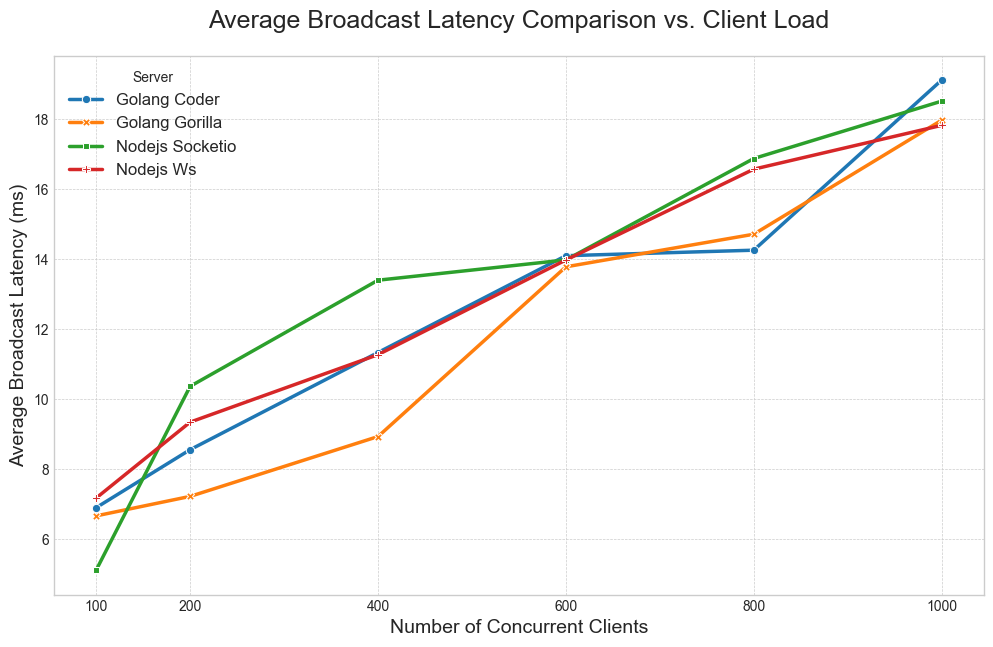

In [5]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

sns.lineplot(data=latency_summary, x='client_load', y='mean', hue='server', style='server', markers=True, dashes=False, lw=2.5)

plt.title('Average Broadcast Latency Comparison vs. Client Load', fontsize=18, pad=20)
plt.xlabel('Number of Concurrent Clients', fontsize=14)
plt.ylabel('Average Broadcast Latency (ms)', fontsize=14)
plt.legend(title='Server', fontsize=12)

plt.xticks(CLIENT_LOADS)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig("broadcast_latency_comparison.png")
plt.show()